<a href="https://colab.research.google.com/github/yokesh412/EMI-Default-Prediction/blob/main/Mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)


In [50]:
dataset = pd.read_csv('/content/drive/MyDrive/emi loan prediction/Copy of sample_data_intw.csv')

**DATA PROFILING**

In [51]:
dataset.shape

(209593, 37)

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

**OBSERVATION**
1. This dataset has 209593 rows and 37 columns

2. It contains 35 numerical variable and 2 categorical variable.

3. Lable feature is our dependent variable.

In [53]:
dataset.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [54]:
#Displaying top 5 rows of the dataset
dataset.head(100)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,1,55707I95201,175.0,4020.000000,5239.700000,399.25,960.81,7.0,0.0,770,3,11.0,3079.0,770.0,20.00,7,3,8570,770.0,18.00,0.0,0.0,0,0,1,6,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-08-12
96,97,0,46737I90844,799.0,-0.900000,-0.900000,140.94,140.94,0.0,0.0,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-27
97,98,1,98423I90582,1283.0,13776.053000,13813.510000,2069.15,3569.39,2.0,0.0,773,10,2.0,10016.0,773.0,74.37,13,2,13272,773.0,59.87,0.0,0.0,0,0,11,66,6.0,0.0,12.0,72,6,0.0,2.800000,4.181818,UPW,2016-07-21
98,99,1,86227I70376,693.0,2600.000000,2600.000000,1243.61,1243.61,8.0,0.0,1539,1,0.0,1539.0,1539.0,89.00,1,0,1539,1539.0,89.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-22


In [55]:
#Droping unwanted columns
dataset = dataset.drop(["Unnamed: 0","pcircle","pdate"], axis=1)

**Data Cleaning**

In [56]:
#checking null values
dataset.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

**OBSERVATION**

our dataset has zero null values.

**Exploratory Data Analysis**

In [57]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  33


In [58]:
## list discrete feature

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 4


In [59]:
dataset.head(10)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
5,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,1539,4,10.0,6156.0,1539.0,15.40,8,0,11744,1539.0,55.90,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333
6,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,5787,1,0.0,5787.0,5787.0,277.80,1,0,5787,5787.0,277.80,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
7,1,09832I90846,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,3178,3,3.0,10404.0,3178.0,36.00,9,3,26095,3178.0,36.00,0.0,0.0,1,0,3,18,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143
8,1,59772I84450,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,1539,4,1.0,6164.0,1539.0,39.90,4,1,6164,1539.0,39.90,0.0,0.0,0,0,4,24,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667
9,1,56331I70783,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,773,1,0.0,773.0,773.0,86.80,1,0,773,773.0,86.80,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000


In [60]:
dataset.shape

(209593, 34)

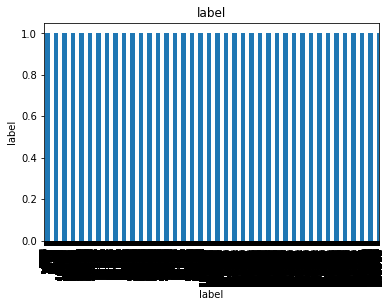

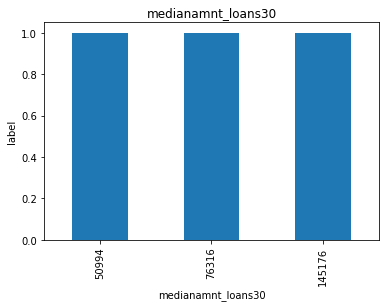

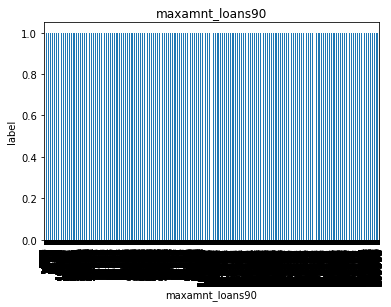

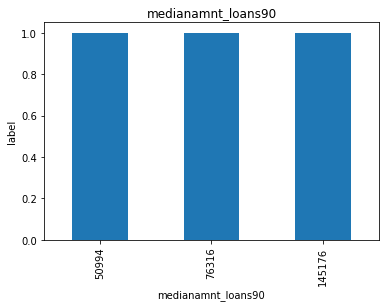

In [ ]:
## ploting discrete features

for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['label'].plot.bar()
    plt.xlabel(feature)
    plt.ylabel('label')
    plt.title(feature)
    plt.show()

In [61]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 29


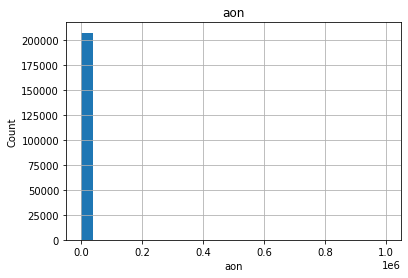

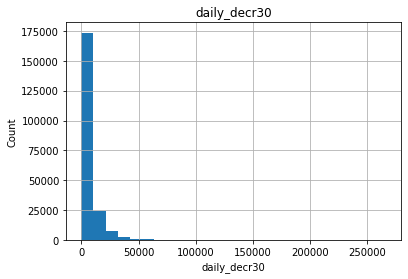

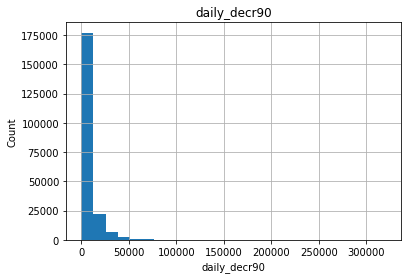

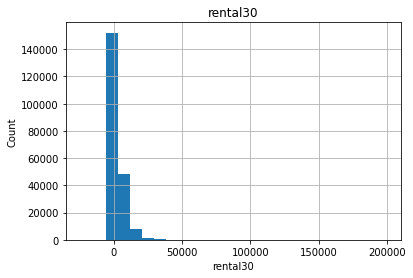

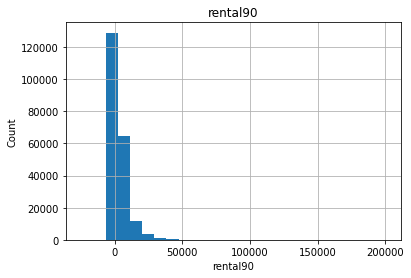

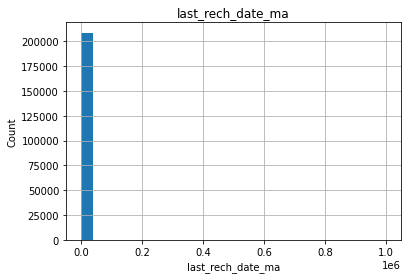

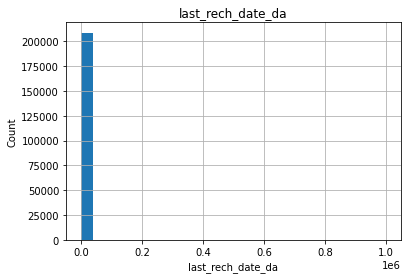

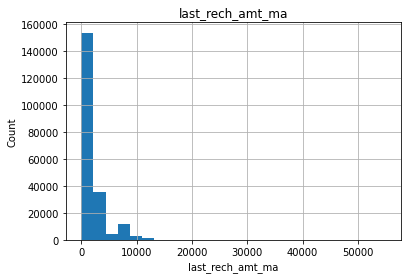

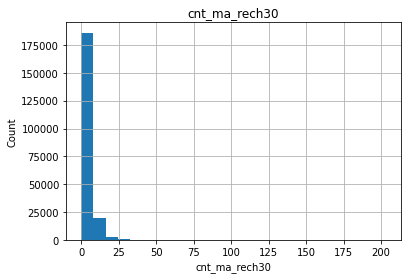

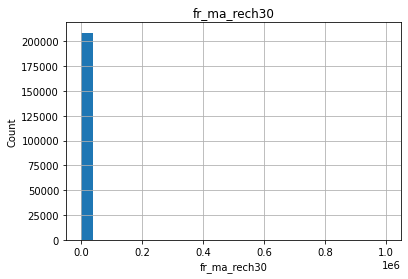

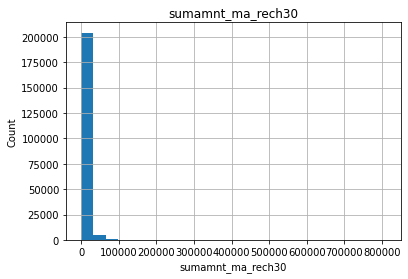

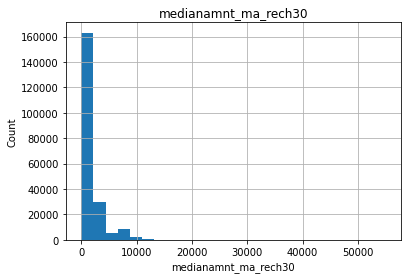

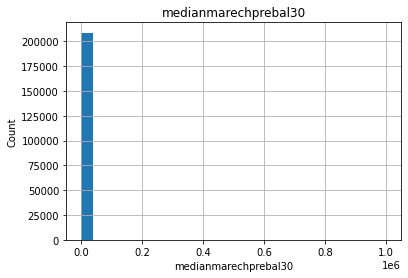

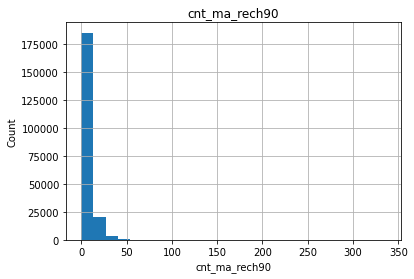

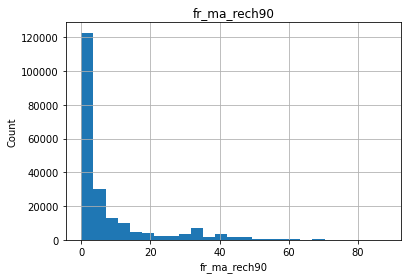

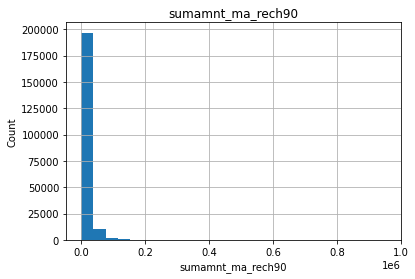

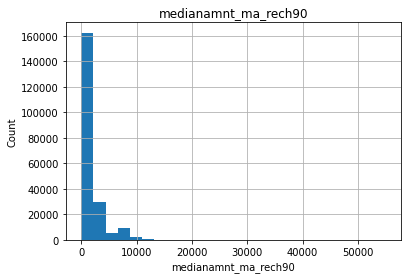

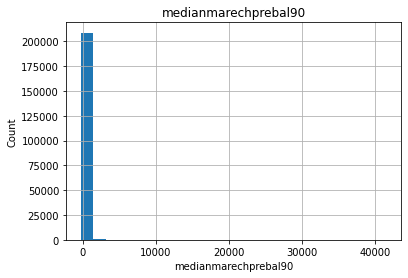

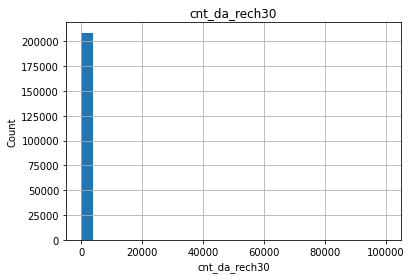

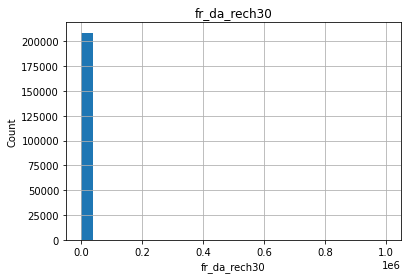

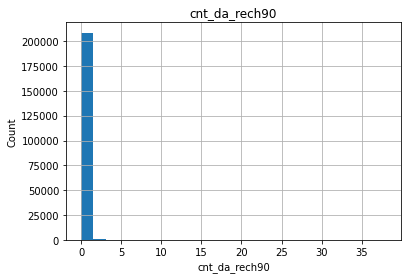

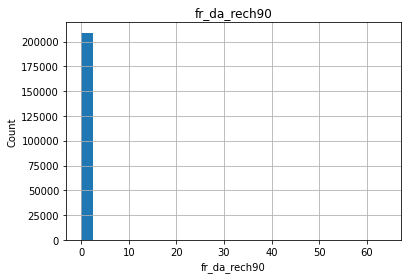

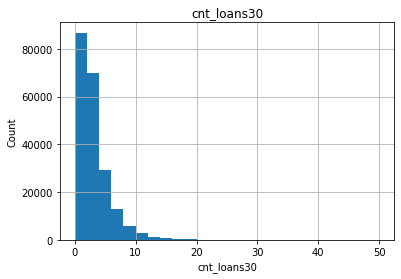

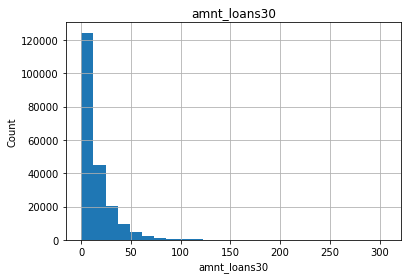

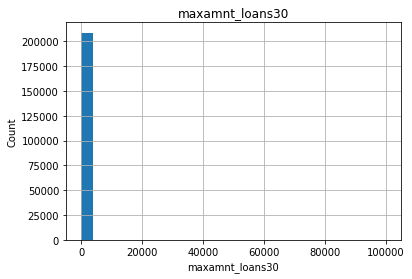

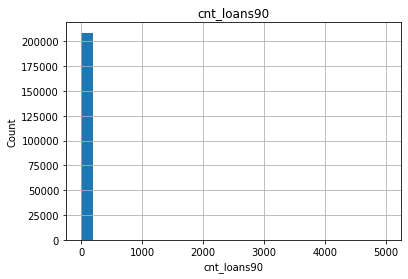

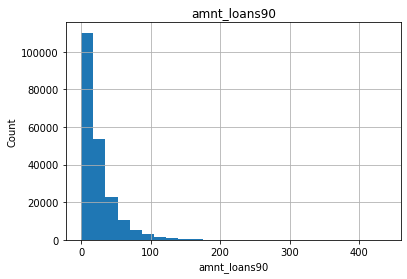

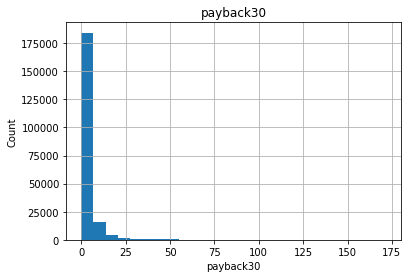

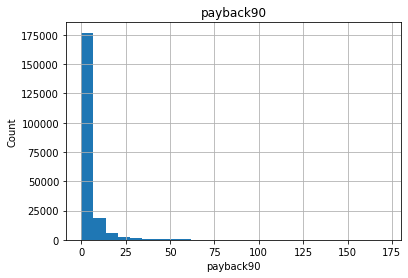

In [62]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

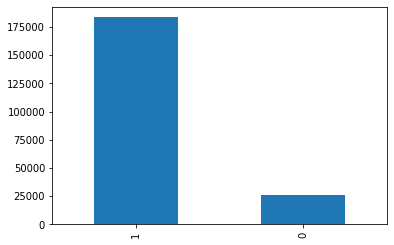

In [63]:
# visualize the target variable
dataset['label'].value_counts().plot.bar()

**OBSERVATIONS**


1. Our Dependent variable(label) is imbalanced.

2.Large number of Continuous variables contains only zeros.

3.Most of the Continuous variables are Skewed in nature.

In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [65]:
dataset.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


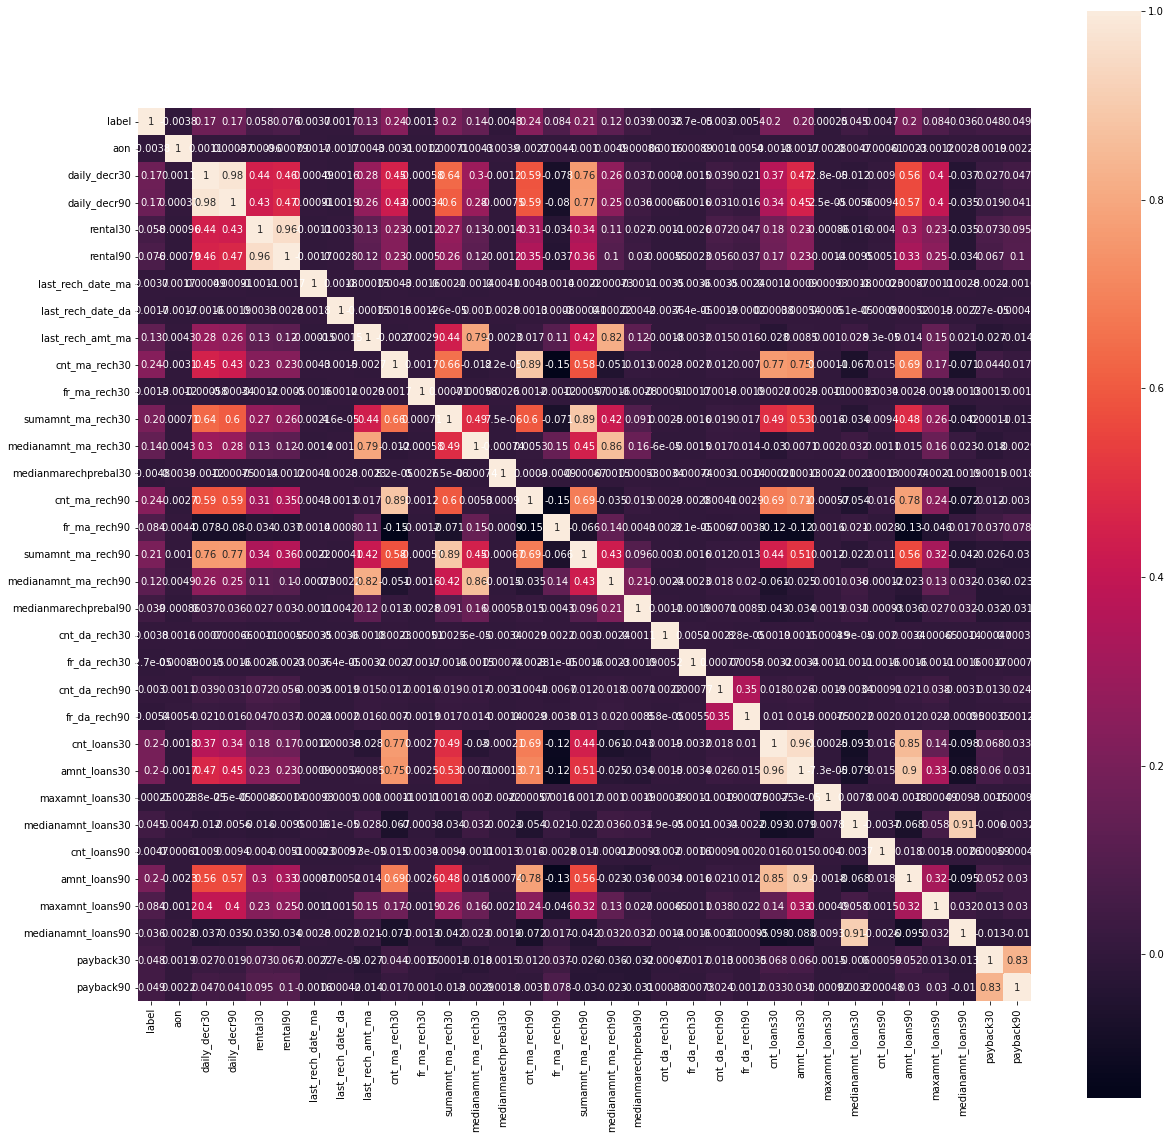

In [66]:
#Heat map to find correlation between independent and dependent variable.
corr_matrix = dataset.corr()
fig = plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, square=True);

**Feature Selection**

In [67]:
corr_matrix = corr_matrix[['label']].copy()

In [68]:
corr_matrix.drop(index='label', inplace=True)

In [69]:
corr_matrix.sort_values('label', inplace=True)

In [70]:
# remove those features who have less than 10% (0.1) relationship with the targe variable

features_to_keep = corr_matrix.loc[~corr_matrix['label'].between(-0.099, 0.0999)]

In [71]:
features_to_keep = features_to_keep.index.tolist()
features_to_keep

['medianamnt_ma_rech90',
 'last_rech_amt_ma',
 'medianamnt_ma_rech30',
 'daily_decr90',
 'daily_decr30',
 'cnt_loans30',
 'amnt_loans30',
 'amnt_loans90',
 'sumamnt_ma_rech30',
 'sumamnt_ma_rech90',
 'cnt_ma_rech90',
 'cnt_ma_rech30']

**OBSERVATION**

1.Using correlation plot, we removed less correlated featues with dependent variable.

2. Number of features is reduced from 37 to 12.

**Data Preprocessing**

In [72]:
#Combining Selected features with dependent variable
processed_data = dataset[features_to_keep+['label']].copy()

In [73]:
processed_data.shape

(209593, 13)

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
#preprocessing data
X_data = processed_data.drop(columns=['label']).copy()
y_data = processed_data[['label']].copy()

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 0)

**OBSERVATION **

we know that our Dependent variable is imbalanced.so, I am using smote technique to balance our dependent variable.

In [77]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [79]:
#fitting training data in SMOTE function.
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)

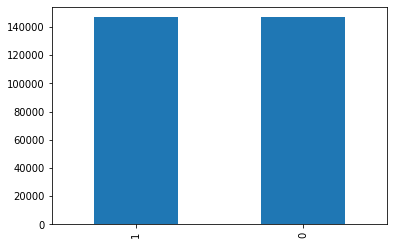

In [80]:
# visualize the target variable
y_train_smote['label'].value_counts().plot.bar()

**Feature Scaling**

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
# Scale the data
scaler = StandardScaler() 
X_train_sc=scaler.fit_transform(X_train_smote)
X_test_sc=scaler.transform(X_test)
y_train_sc=scaler.fit_transform(y_train_smote)
y_test_sc=scaler.transform(y_test)

**Model Training**

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import time
from math import sqrt

In [38]:
#Creating list models
models = [
           ['LogisticRegression: ',LogisticRegression()],
           ['LogisticRegressionCV: ', LogisticRegressionCV()],
           ['DecisionTreeClassifier: ', DecisionTreeClassifier()],
           ['KNeighborsClassifier: ',  KNeighborsClassifier()],
           ['GaussianNB:' , GaussianNB()],
           
         ]

In [84]:
#Iterating over each model and evaluating performance of the model
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train_sc,y_train_sc)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["roc_auc_score"] = roc_auc_score(y_train_smote,curr_model.predict(X_train_smote))
    curr_model_data["accuracy_score"] = accuracy_score(y_test,curr_model.predict(X_test))
    curr_model_data["confusion_matrix"] = confusion_matrix(y_test,curr_model.predict(X_test))
    model_data.append(curr_model_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

In [85]:
#printing name, training time, performance of the model
model_data

[{'Name': 'LogisticRegression: ',
  'Train_Time': 8.053305625915527,
  'accuracy_score': 0.8707268780266705,
  'confusion_matrix': array([[    0,     0,     0],
         [ 1053,     0,  4258],
         [  108,     0, 36500]]),
  'roc_auc_score': 0.5963915735273084},
 {'Name': 'LogisticRegressionCV: ',
  'Train_Time': 85.62223625183105,
  'accuracy_score': 0.8708223001502898,
  'confusion_matrix': array([[    0,     0,     0],
         [ 1013,     0,  4298],
         [  104,     0, 36504]]),
  'roc_auc_score': 0.5925127534514347},
 {'Name': 'DecisionTreeClassifier: ',
  'Train_Time': 3.6552350521087646,
  'accuracy_score': 0.07705336482263413,
  'confusion_matrix': array([[    0,     0,     0],
         [ 3154,     0,  2157],
         [33378,     0,  3230]]),
  'roc_auc_score': 0.34838206548020406},
 {'Name': 'KNeighborsClassifier: ',
  'Train_Time': 1.1928577423095703,
  'accuracy_score': 0.872587609437248,
  'confusion_matrix': array([[    0,     0,     0],
         [   10,     0,  53

In [86]:
#Converting model data to pandas dataframe
result_df = pd.DataFrame(model_data)
print(result_df)

                       Name  Train_Time  roc_auc_score  accuracy_score  \
0      LogisticRegression:     8.053306       0.596392        0.870727   
1    LogisticRegressionCV:    85.622236       0.592513        0.870822   
2  DecisionTreeClassifier:     3.655235       0.348382        0.077053   
3    KNeighborsClassifier:     1.192858       0.500793        0.872588   
4               GaussianNB:    0.082449       0.499935        0.873256   

                                 confusion_matrix  
0   [[0, 0, 0], [1053, 0, 4258], [108, 0, 36500]]  
1   [[0, 0, 0], [1013, 0, 4298], [104, 0, 36504]]  
2  [[0, 0, 0], [3154, 0, 2157], [33378, 0, 3230]]  
3      [[0, 0, 0], [10, 0, 5301], [30, 0, 36578]]  
4        [[0, 0, 0], [0, 0, 5311], [2, 0, 36606]]  


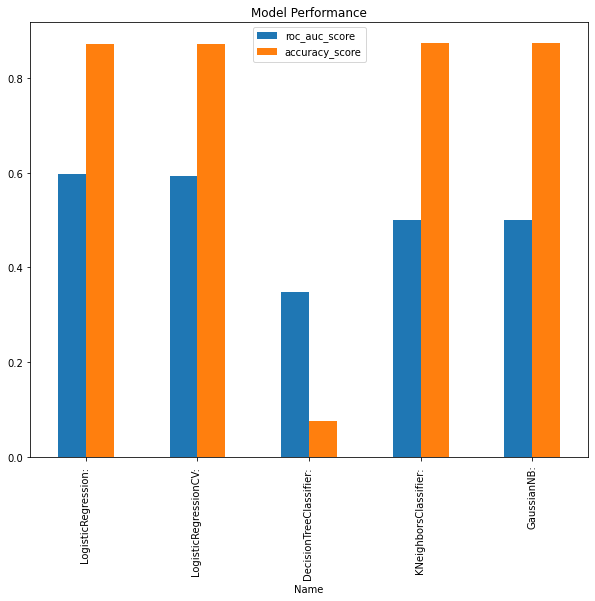

In [87]:
#visualizing result
result_df.plot(x="Name", y=['roc_auc_score' , 'accuracy_score'], 
               kind="bar" , 
               title = 'Model Performance' , 
               figsize= (10,8)) 

**OBSERVATION**

Out of five machine learning algorithms LogisticRegression and Logistic RegressionCV performed better with good Accuracy(87%) and ROC Accuracy score(59%).

In [88]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
import numpy as np


In [89]:
logModel = LogisticRegression()

In [99]:
param_grid = [    
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4),
    'solver' : ['lbfgs'],
    'max_iter' : [ 10]
    }
]

In [100]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 2, verbose=True, n_jobs=-1)

In [ ]:
best_clf = clf.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


In [ ]:
best_clf.best_estimator_

In [ ]:
print (f'Accuracy - : {best_clf.score(X_train_smote,y_train_smote):.3f}')